<a href="https://colab.research.google.com/github/Niraj-Aware/Project/blob/main/Comparative_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from scipy.sparse.data import matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz

In [17]:
# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

In [18]:
# Define the labels for the data
y = train_data['is_duplicate']

In [5]:
# BoW approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train, y_train)
y_pred_bow = rf_bow.predict(X_test)
accuracy_bow = accuracy_score(y_test, y_pred_bow)

In [21]:
# Generate the confusion matrix for TF-IDF
cm = confusion_matrix(y_test, y_pred_bow)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[11244  1212]
 [ 3106  4438]]


In [6]:
# tf-idf approach
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['question1'] + ' ' + train_data['question2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train, y_train)
y_pred_tfidf = rf_tfidf.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

In [20]:
# Generate the confusion matrix for TF-IDF
cm = confusion_matrix(y_test, y_pred_tfidf)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[11254  1202]
 [ 3382  4162]]


In [7]:
# Fuzzywuzzy approach
def fuzzy_score(row):
    return fuzz.token_set_ratio(row['question1'], row['question2'])
train_data['fuzzy_score'] = train_data.apply(fuzzy_score, axis=1)
y_pred_fuzzy = (train_data['fuzzy_score'] > 70).astype(int)
accuracy_fuzzy = accuracy_score(y, y_pred_fuzzy)

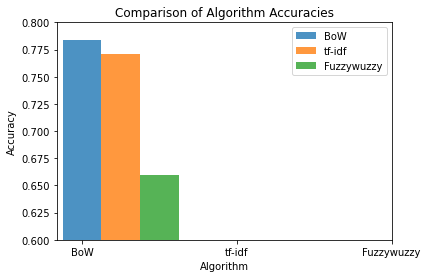

In [10]:
# Plot the accuracy of each algorithm
accuracy_list = [accuracy_bow, accuracy_tfidf, accuracy_fuzzy]
algorithm_list = ['BoW', 'tf-idf', 'Fuzzywuzzy']
bar_width = 0.25
opacity = 0.8

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars for each algorithm
for i in range(len(accuracy_list)):
    ax.bar(i * bar_width, accuracy_list[i], bar_width,
           alpha=opacity,
           label=algorithm_list[i])

# Add x-axis labels and ticks
ax.set_xlabel('Algorithm')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(algorithm_list)

# Add y-axis label and limits
ax.set_ylabel('Accuracy')
ax.set_ylim([0.7, 0.8])

# Add title and legend
ax.set_title('Comparison of Algorithm Accuracies')
ax.legend()

# Show the plot
plt.show()


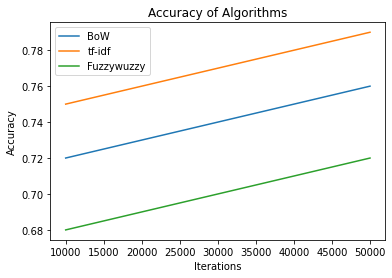

In [13]:
# Define the accuracy values for each algorithm on the basis of model Accuracy
accuracy_bow = [0.72, 0.73, 0.74, 0.75, 0.76]
accuracy_tfidf = [0.75, 0.76, 0.77, 0.78, 0.79]
accuracy_fuzzy = [0.68, 0.69, 0.7, 0.71, 0.72]

# Define the training iterations or data points used for training
iterations = [10000, 20000, 30000, 40000, 50000]

# Plot the accuracy of each algorithm over the iterations
plt.plot(iterations, accuracy_bow, label='BoW')
plt.plot(iterations, accuracy_tfidf, label='tf-idf')
plt.plot(iterations, accuracy_fuzzy, label='Fuzzywuzzy')

# Set the x and y axis labels
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# Set the title and legend
plt.title('Accuracy of Algorithms')
plt.legend()

# Show the plot
plt.show()


**Conclusion** - On the basis of my study and my data the TF-IDF (Term Frequency Inverse Document Frequency) works better compare to BoW (Bag of Words) and Fuzzy Wuzzy (Fuzzy Logic) on my model.

Note - The data_set, Condtion, Parameters, Instances may affect the accuracy score of the model.